In [82]:
from matplotlib import pyplot
%matplotlib inline
# display large graph 20 cm X 20 cm
pyplot.rcParams["figure.figsize"] = 20, 20
pyplot.rcParams.update({'font.size': 22}) # increase font size to be readable!
from scipy import stats

# Amino Acid Selection Pressure Analysis of HIV

### The HIV Protease and RT mutations dataset

This dataset consists of approximately 2 million mutations from sequencing of HIV protease and reverse transcriptase genes from 50,000 clinical samples (Chen et al.).  Each line in the dataset has the format

`position codon amino-acid wt-codon wt-amino-acid sampleID`

We read the data as follows:

In [83]:
muts = []
with open('/var/local/C100/hiv_snp_sample_obs.txt') as ifile:
    for line in ifile:
        t = line.split() # split a string using whitespace as field separator
        if t[1] != t[3]:
            muts.append((int(t[0]),t[1], t[2], t[3], t[4], int(t[5]))) # store position and sampleID as integers
print(len(muts), muts[0])

1984182 (101, 'acc', 'T', 'ccc', 'P', 1116)


### Categorizing the mutations by codon position

For Ka/Ks analysis we need to be able to look at the set of all mutations at a given codon position.  So let's start by building a `dict` whose keys are codon-positions and whose associated values are the lists of mutations at a given codon-position.

* to create our dictionary, we'd first like to have a list of codon-positions with NO repeats, i.e. each codon position appears exactly once.  This is easily achieved by using a Python `set()`, which is like a list except that it guarantees uniqueness, i.e. if you add the same value more than once, `set()` will store it as only a single value.  Here's how to use it:

In [84]:
pset = set([t[0] for t in muts]) # reduce muts to set of unique codon positions
print(len(pset))
pset

448


{5,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,


* to keep things simple, let's just use the numerical index of a mutation in our list as the "ID" of that mutation
* to store a list of mutations, let's just store a list of their IDs, i.e. the numerical index we just defined.

In [85]:
positions = {}
for position in pset:
    positions[position] = [] # create an empty list for each codon position
for i in range(len(muts)):
    position = muts[i][0] # get this mutation's codon position
    positions[position].append(i) # add this mutation ID to this position
print(len(positions))
positions[10]

448


[77839,
 77840,
 77841,
 77842,
 77843,
 77844,
 77845,
 77846,
 77847,
 77848,
 77849,
 77850,
 77851,
 77852,
 77853,
 77854,
 77855,
 77856,
 77857,
 77858,
 77859,
 77860,
 77861,
 77862,
 77863,
 77864,
 77865,
 77866,
 77867,
 77868,
 77869,
 77870,
 77871,
 77872,
 77873,
 77874,
 77875,
 77876,
 77877,
 77878,
 77879,
 77880,
 77881,
 77882,
 77883,
 77884,
 77885,
 77886,
 77887,
 77888,
 77889,
 77890,
 77891,
 77892,
 77893,
 77894,
 77895,
 77896,
 77897,
 77898,
 77899,
 77900,
 77901,
 77902,
 77903,
 77904,
 77905,
 77906,
 77907,
 77908,
 77909,
 77910,
 77911,
 77912,
 77913,
 77914,
 77915,
 77916,
 77917,
 77918,
 77919,
 77920,
 77921,
 77922,
 77923,
 77924,
 77925,
 77926,
 77927,
 77928,
 77929,
 77930,
 77931,
 77932,
 77933,
 77934,
 77935,
 77936,
 77937,
 77938,
 77939,
 77940,
 77941,
 77942,
 77943,
 77944,
 77945,
 77946,
 77947,
 77948,
 77949,
 77950,
 77951,
 77952,
 77953,
 77954,
 77955,
 77956,
 77957,
 77958,
 77959,
 77960,
 77961,
 77962,
 77963,


# Simplistic Ka/Ks Analysis

Let's first perform the Ka/Ks analysis using the simplistic assumption that under a neutral model, one-third of mutations in a codon would be expected to be *synonymous* (no change in the amino acid).

* for convenience, **write a function** `is_synonymous(i)` that returns True if a mutation `muts[i]` is synonymous (or False if it's non-synonymous):

In [86]:
def is_synonymous(i):
    return muts[i][2] == muts[i][4]

### using filter() to extract synonymous mutations

Python's built-in function `filter(f, l)` will screen the input list `l` for just those items `l[i]` for which the function `f(l[i])` returns `True`.  We can use that immediately to count the synonymous mutations at any position, as shown in the following example:

In [87]:
print(len(positions[10]), len(list(filter(is_synonymous, positions[10]))))

11166 3559


**QUESTION**: Calculate the Ka/Ks for this position, using the simplistic assumption that one-third of mutations are expected to be synonymous under a neutral model.  Does this appear to be positive, negative, or neutral selection?

**ANSWER**: See code snippet and output below. This appears to be positive selection.

In [88]:
((len(positions[10])- len(list(filter(is_synonymous, positions[10]))))/ len(list(filter(is_synonymous, positions[10])))) * (1/2)

1.0686990727732508

### Writing a function to calculate Ka/Ks

**write a function** `calc_kaks(l)` that calculates Ka/Ks such that `calc_kaks(positions[10])` gives the same result as you just obtained.  Note: be careful to handle cases where the number of synonymous mutations is zero (your code should not proceed to attempt a Ka/Ks calculation in that case, as dividing by zero will result in an error in Python).  In that case, your function should simply return a Ka/Ks value of `0.` (zero).

In [89]:
def calc_kaks(l):
    if len(list(filter(is_synonymous, l))) == 0:
        return 0
    else:
        return (len(l)-len(list(filter(is_synonymous, l))))/len(list(filter(is_synonymous, l))) * (1/2)

**QUESTION**: use your function to compute Ka/Ks for every position.  Then report the top 10 positions with highest Ka/Ks values

**ANSWER**: View code snippet and output below.

In [90]:
kaks = []
for t in positions.items():
    kaks.append((calc_kaks(t[1]), t[0]))
    
kaks.sort(reverse=True)
print(kaks[:10])

[(434.0625, 13), (146.14361702127658, 37), (47.254901960784316, 62), (45.2673031026253, 314), (44.917748917748916, 372), (41.885572139303484, 235), (39.333333333333336, 446), (35.01709401709402, 278), (33.725, 202), (28.75968992248062, 393)]


### Making a bar graph of Ka/Ks

Let's make a bar graph of Ka/Ks (on the y-axis) vs. codon position (on the x-axis).  Since Ka/Ks has a very wide range of values, ranging from strong negative selection e.g. 0.01 to strong positive selection e.g. 100, let's use a log scale for the Ka/Ks axis:

<BarContainer object of 448 artists>

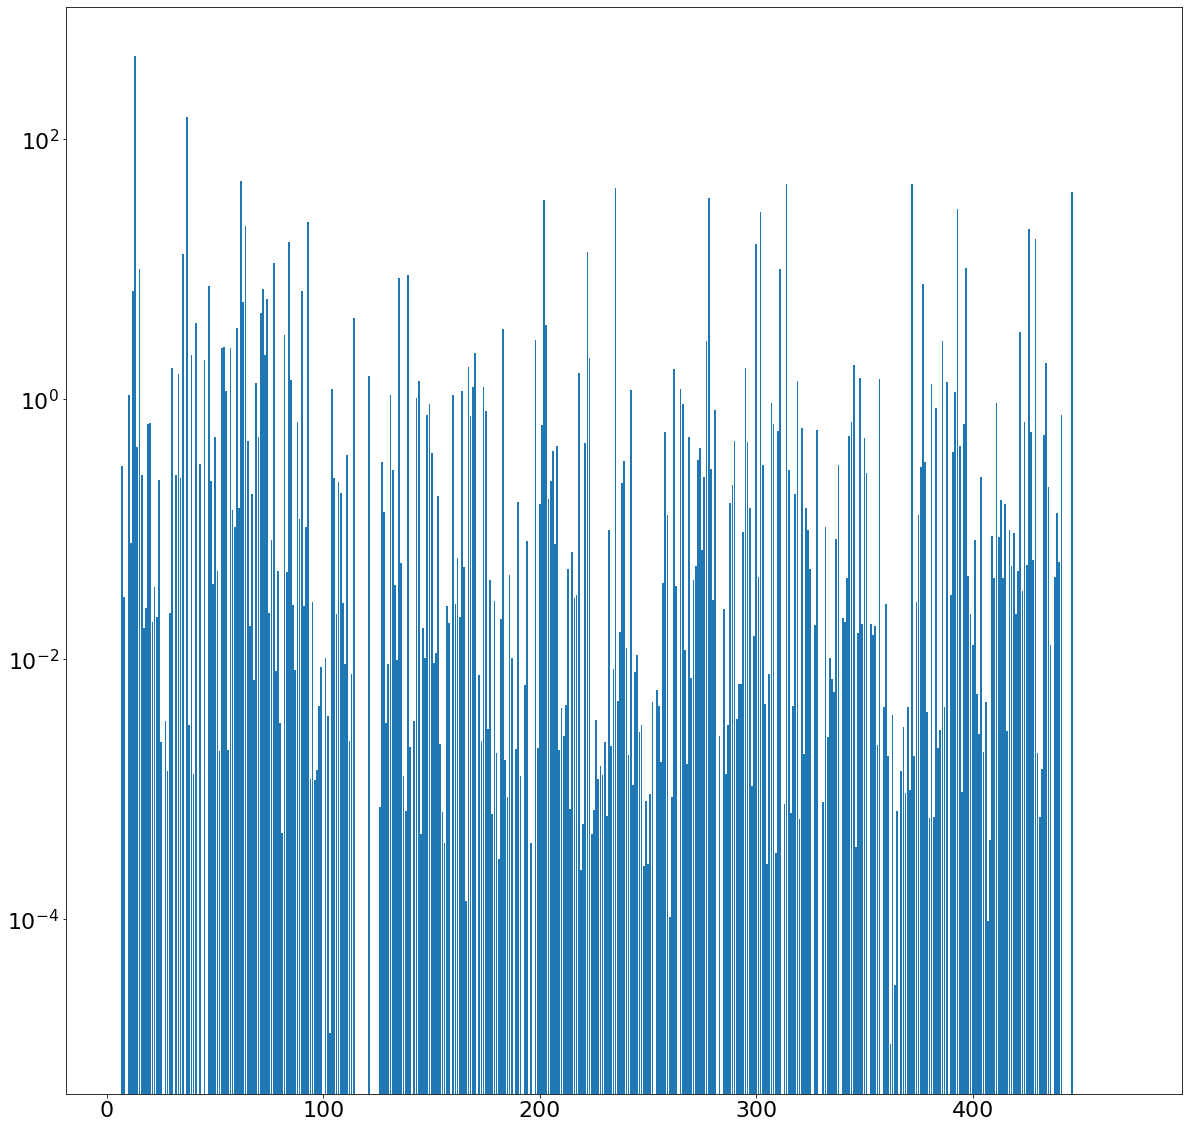

In [91]:
posKaKs = [(t[1], t[0]) for t in kaks]
posKaKs.sort()
pyplot.bar([t[0] for t in posKaKs], [t[1] for t in posKaKs], log=True) # plot bar graph with log y-scale

* **QUESTION**: in what ways was this Ka/Ks calculation overly simplistic, i.e. not an accurate estimator of the actual amino acid selection ratio?

* **ANSWER**: It is not conditional, so it doesn't take into account other potential amino acid site interactions.

### Predicting causes of drug resistance in HIV Protease

The following 21 codons have been identified by experimental studies as HIV protease mutation sites that cause clinical drug resistance.  Print their calculated Ka/Ks values to see if they show signs of positive selection pressure in your analysis.

In [92]:
drpos = [8, 10, 20, 24, 30, 32, 33, 47, 48, 50, 53, 54, 63, 71, 73, 77, 82, 84, 88, 90, 93]
for i in drpos:
    print(calc_kaks(positions[i]))

0.03
1.0686990727732508
0.6570898980537535
0.2365097588978186
1.717479674796748
0.25857687420584496
1.5537825059101655
7.351851851851852
0.23203070481507326
0.5109289617486339
2.471830985915493
2.4971815107102593
5.5413105413105415
4.6037364798426745
2.1877637130801686
11.156862745098039
3.1114958448753463
16.155172413793103
0.6695702671312428
6.816187594553707
22.83265306122449


Using Ka/Ks > 1.5 as your criterion for significant positive selection, **use the hypergeometric to compute the False Positive Likelihood** for whether your positive selection results appear to predict codons that cause drug resistance.

In [93]:
a = []
b = []
for t in kaks:
    if t[0] > 1.5:
        a.append(t[0])
    if t[0] > 1.5 and t[1] in drpos:
        b.append(t[0])

h = stats.hypergeom(len(positions), len(a), len(drpos))
h.sf(len(b)-1)

9.089606574212383e-08

* **QUESTION**: is your prediction statistically significant?

* **ANSWER**: Yes, our prediction is statistically significant. False positive likelihood is small.

# Simplistic Conditional Ka/Ks Analysis

In this segment we will seek to identify pairs of codons that show evidence of conditional selection.  To keep the analysis as simple as possible, we will just use the hypergeometric to detect pairs where non-synonymous mutations co-occur much more frequently than expected in the absence of conditional selection.

To do this, we need to cross-reference which mutations co-occur in the same person (sample).  Here we first make an index of which samples have non-synonymous mutations at each amino acid position.  Note that we use a Python `set()` to store the list of samples for each position.  Using a `set()` will make it really easy later on to speedily obtain the intersection between two sets (i.e. the subset of samples that had non-synonymous mutations at BOTH of a given pair of positions).

* note: one convenient feature of Python is that you can retrieve items from a list using negative index numbers to count backwards from the **end of the list**, e.g. `l[-1]` is the last item in the list, `l[-2]` is the item just preceding it etc.

In [94]:
posSamplesNS = {}
for position in positions:
    posSamplesNS[position] = set() # initialize it to an empty set
for m in muts:
    if m[2] != m[4]: # this mutation changed the amino acid
        posSamplesNS[m[0]].add(m[-1]) # add its sampleID to the set for this position

### Counting the total number of samples
To calculate the hypergeometric, we need the total number of samples `N`.  Write code using a Python `set()` to **make a list of unique sample IDs** (i.e. each sample ID occurs only once in the set), and then get its count `N` using `len()`:

In [95]:
N = len(set([t[-1] for t in muts]))

### Pairwise mutation co-occurrence using set intersection
Next let's use `posSamplesNS` to analyze for each pair of positions which samples had non-synonymous mutations at **both** positions.  This is trivial (and fast) using the *set intersection operator* `&`:

In [96]:
paircounts = []
for p1, samples1 in posSamplesNS.items(): # consider all codon pairs (p1,p2)
    M = len(samples1)
    for p2, samples2 in posSamplesNS.items():
        n = len(samples2)
        if p1 < p2 and M > 0 and n > 0: # non-redundant and non-zero
            m_obs = len(samples1 & samples2) # get the subset of samples in BOTH samples1 and samples2
            paircounts.append((N, M, n, m_obs, p1, p2))
len(paircounts)

91806

### Using the hypergeometric to detect pairs with significant co-occurence

**Write code to calculate False Positive Likelihoods** $p(m \ge m_{obs}|N,M,n,h^-)$ for each codon pair under the hypergeometric null hypothesis $h^-$.  In order to speed up this computationally intensive analysis, exclude pairs with very few co-occurence counts i.e. $m_{obs} \le 5$, since those are unlikely to be statistically significant.  Also calculate the *conditional selection ratio* for each pair

$r = (m_{obs}/M) / (n / N)$

In [97]:
pvals = []
for N, M, n, m_obs, p1, p2 in paircounts:
    if m_obs > 5:
        r = (m_obs / M) / (n / N)
        h = stats.hypergeom(N, M, n)
        pval = h.sf(m_obs - 1)
        pvals.append((pval, p1, p2, r))
pvals.sort()
pvals[:30]

[(0.0, 10, 46, 3.3109351356026693),
 (0.0, 10, 54, 3.982029802543224),
 (0.0, 10, 62, 1.9360771836652453),
 (0.0, 10, 71, 2.584004817915847),
 (0.0, 10, 73, 3.4464043243383378),
 (0.0, 10, 82, 3.422525271624971),
 (0.0, 10, 84, 3.9790643969190462),
 (0.0, 10, 90, 2.947032628410519),
 (0.0, 10, 93, 1.8624485565012205),
 (0.0, 10, 141, 2.1405875366476947),
 (0.0, 10, 167, 2.2389316654768034),
 (0.0, 10, 310, 2.3395155431197923),
 (0.0, 10, 319, 2.2002355449203406),
 (0.0, 20, 35, 2.566985313943889),
 (0.0, 20, 36, 3.8411167842703473),
 (0.0, 20, 54, 4.189119622895794),
 (0.0, 20, 71, 2.671521057186084),
 (0.0, 20, 90, 2.8442030038249335),
 (0.0, 24, 46, 7.0076409517057066),
 (0.0, 24, 54, 7.520262542205059),
 (0.0, 24, 82, 7.957616326212571),
 (0.0, 30, 88, 15.085664358991465),
 (0.0, 32, 46, 6.542666433935414),
 (0.0, 32, 47, 49.05531659435942),
 (0.0, 35, 36, 2.478872380154672),
 (0.0, 35, 63, 1.4551522938638601),
 (0.0, 36, 37, 1.5332451720999658),
 (0.0, 36, 62, 2.331327108343628),
 

### Bonferroni Filtering

**Write code to filter your results** such that the total number of expected false positives from the whole analysis will be only one.  Store your filtered results in a list `qvals` of tuples of the form `(fpl, p1, p2, r)`:

In [98]:
npairs = len(positions) * (len(positions)-1)/2
for t in pvals:
    qvals = [(t[0], t[1], t[2], t[3]) for t in pvals if t[0] <= 1/npairs]
print(len(qvals))

4056


* **QUESTION**: what is the number of pairs that pass this filter?
* **ANSWER**: 4056

### Graphing Codon Pair Interactions

It's often useful to make a "big picture" that allows you to see the most significant effects in your dataset in a single view.  To squeeze in as much information as possible in a coherent way, let's use **four** different graphical channels at once:

* X axis: first codon position of the interacting pair
* Y axis: second codon position of the pair
* color: statistical significance (False Positive Likelihood).  Because the FPL has a huge range, we display it using a log-scale.  Second, to prevent FPL values of zero from blowing up, we set a "floor" of 1e-50 for the FPL.
* size: we scale the size of the dot based on the conditional selection ratio *r*

Note also that to make it possible to see overlapping dots, we make them partly transparent (50% alpha value).

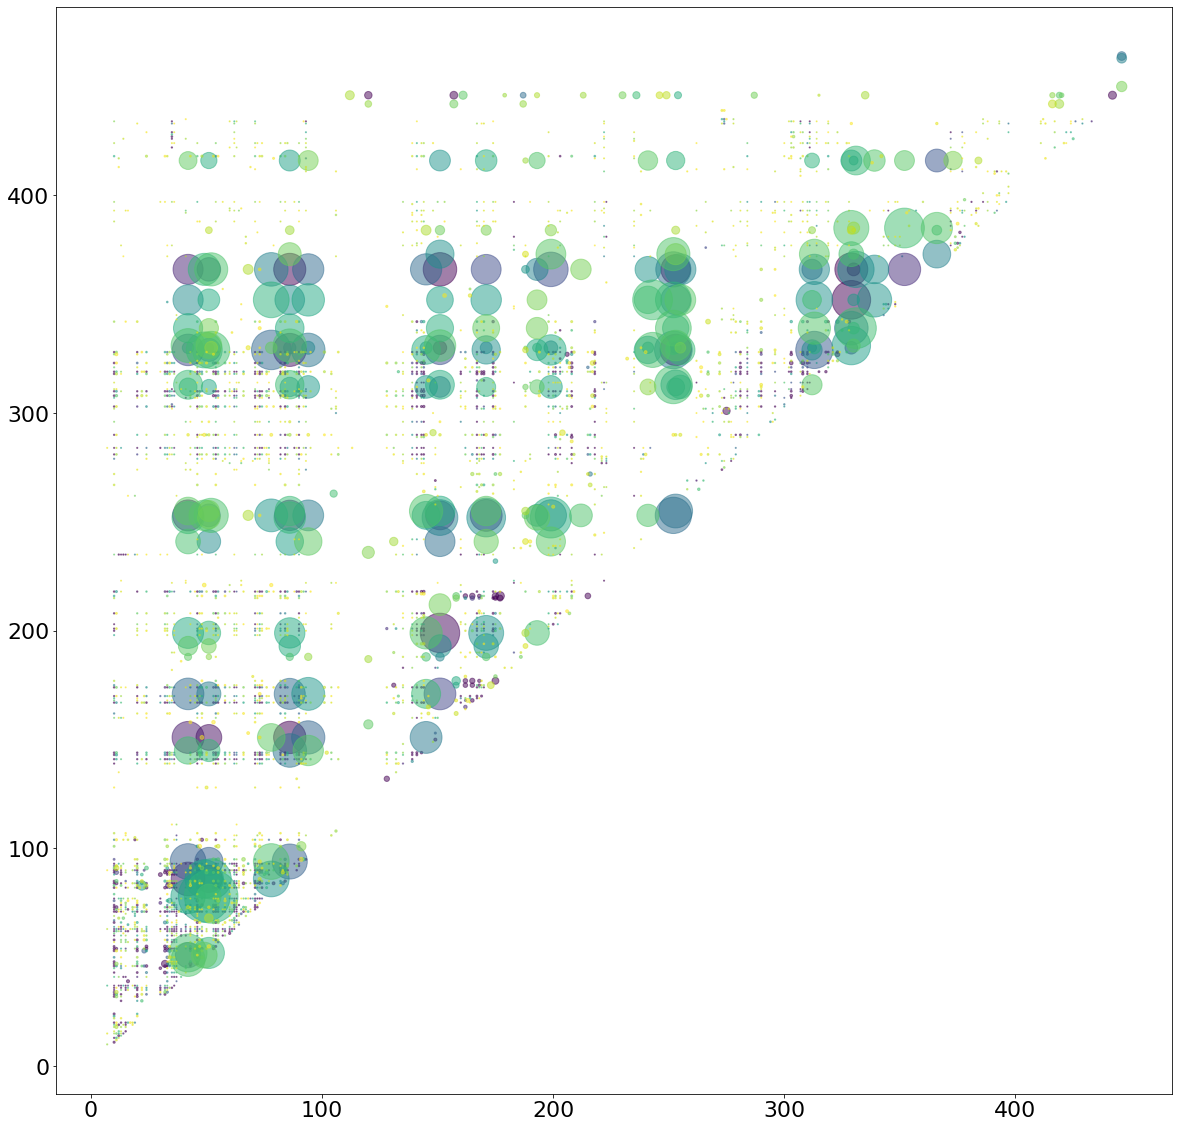

In [99]:
from math import log
xvals = [t[1] for t in qvals]
yvals = [t[2] for t in qvals]
cvals = [log(max(1e-50, t[0])) for t in qvals]
svals = [t[3] for t in qvals]
pyplot.scatter(xvals, yvals, c=cvals, s=svals, alpha=0.5)